<a href="https://colab.research.google.com/github/CodePranshu/OIBSIP_Task-1_Calculator-/blob/main/PranshuDeshmukh0801CA221042GoldPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs and charts
import seaborn as sns #drawing statistical graphics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from google.colab import drive

Data Collection and Processing


In [ ]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/gld_price_data.csv'
gold_data = pd.read_csv(path)

Mounted at /content/drive


# New Section

In [ ]:
# printing first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# printing last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows & columns
gold_data.shape

(2290, 6)

In [ ]:
# metadata about data
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [ ]:
# checking missing values if any
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


FINDING CORRELATION

In [ ]:
correlation = gold_data.corr()

<ipython-input-9-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

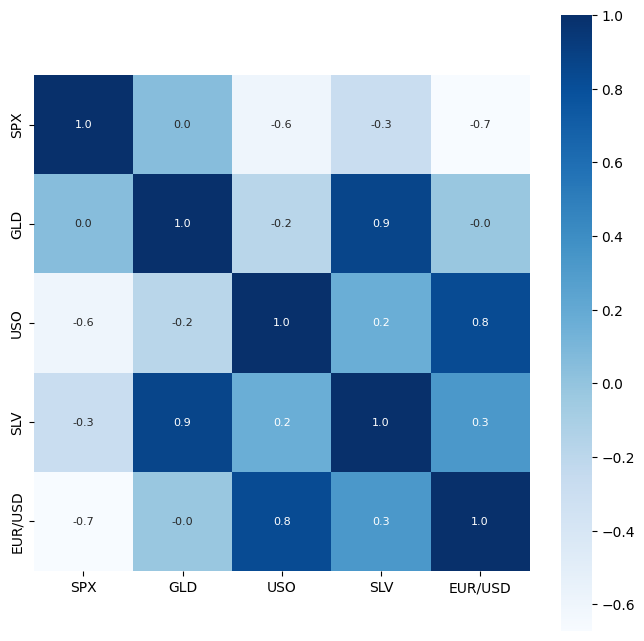

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize =(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-12-5d3714bb16a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

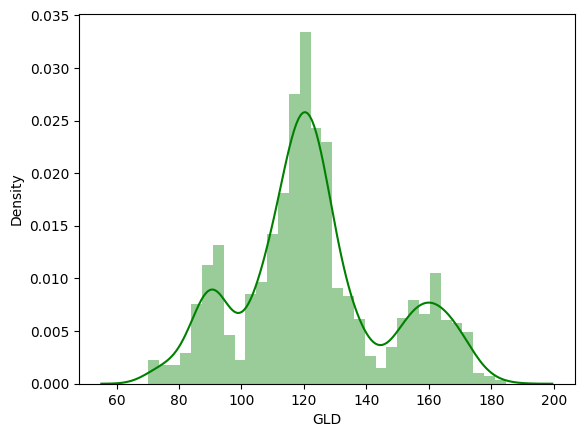

In [ ]:
# checking the distributionof the GoLD Price
sns.distplot(gold_data['GLD'], color='green')

SPLTTING THE FEATURES AND TARGET

In [ ]:
X = gold_data.drop(['Date','GLD'], axis =1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training:
Random Forset Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.71829926  82.01469967 115.95180023 127.64750078 120.63770139
 154.70469782 150.16029857 126.1748001  117.55679878 126.09490052
 116.78000123 172.31870098 141.20059821 167.90979871 115.27849993
 117.27230031 139.49100283 170.26110099 158.83530241 158.82359944
 155.16129968 124.95170038 176.50239949 158.1159032  125.24600063
  93.69679959  77.38440025 120.42890037 119.11359977 167.54919932
  88.2678006  125.19060016  91.13810047 117.74120048 121.17849937
 136.6374009  115.41920116 115.4489008  146.5884996  107.09730114
 104.61050277  87.07779771 126.49390097 118.10020014 152.74119905
 119.58110012 108.44969965 108.02779806  93.12930008 127.21249741
  74.96020022 113.67549927 121.24430021 111.34969937 118.74779886
 120.40839954 159.71279855 169.23650101 147.12169738  85.76179849
  94.28540013  86.84799906  90.73449998 119.09130099 126.44120074
 127.52709953 169.10320086 122.30909953 117.42059892  98.83020046
 168.60080144 143.10669883 131.86910221 121.16120191 120.79929974
 119.84370

In [ ]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891899315187918


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

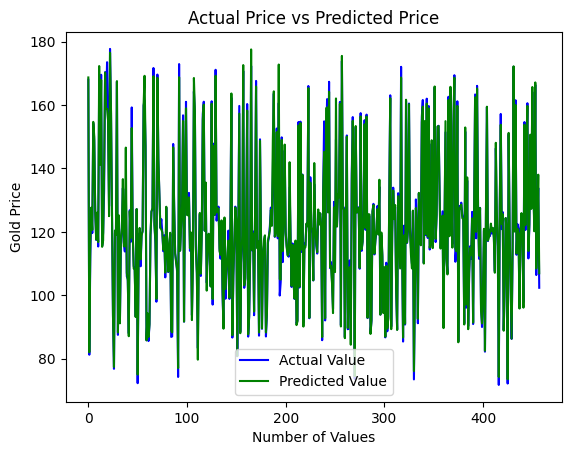

In [ ]:
plt.plot(Y_test, color= 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color= 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score, r2_score

In [ ]:
mse = mean_squared_error(Y_test, test_data_prediction)
explained_var = explained_variance_score(Y_test, test_data_prediction)
r2 = r2_score(Y_test, test_data_prediction)
print(f"Mean Squared Error: {mse}")
print(f"Explained Variance: {explained_var}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.701700362033588
Explained Variance: 0.9892927700329591
R-squared: 0.9891899315187918
